In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfD= pd.read_csv("CBS_2021-2023_Daily_Weather.csv")

In [3]:
dfD.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,01-01-2021,590,961,-0.9,2.3,63,10.6
1,2874,02-01-2021,2844,5718,4.8,7.6,61,19.1
2,495,03-01-2021,1133,1628,0.9,3.9,63,13.0
3,907,04-01-2021,2074,2981,1.0,4.1,3,13.3
4,1057,05-01-2021,2004,3061,1.4,4.0,51,9.2


In [4]:
dfD.columns

Index(['Casual', 'Date', 'Member', 'Total_rides',
       'apparent_temperature_mean (°C)', 'temperature_2m_mean (°C)',
       'weathercode (wmo code)', 'windspeed_10m_max (km/h)'],
      dtype='object')

In [5]:
dfD = dfD.rename(columns={'weathercode (wmo code)':'weather',
                       'apparent_temperature_mean (°C)':'Atemp',
                       'temperature_2m_mean (°C)':'Temp',
                       'windspeed_10m_max (km/h)':'Windspeed',
                       'Day_of_Week':'Weekdays'})
dfD.head()

,Casual,Date,Member,Total_rides,Atemp,Temp,weather,Windspeed
0,371,01-01-2021,590,961,-0.9,2.3,63,10.6
1,2874,02-01-2021,2844,5718,4.8,7.6,61,19.1
2,495,03-01-2021,1133,1628,0.9,3.9,63,13.0
3,907,04-01-2021,2074,2981,1.0,4.1,3,13.3
4,1057,05-01-2021,2004,3061,1.4,4.0,51,9.2


In [6]:
dfD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Casual       1095 non-null   int64  
 1   Date         1095 non-null   object 
 2   Member       1095 non-null   int64  
 3   Total_rides  1095 non-null   int64  
 4   Atemp        1095 non-null   float64
 5   Temp         1095 non-null   float64
 6   weather      1095 non-null   int64  
 7   Windspeed    1095 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 68.6+ KB


In [7]:
dfD.isnull().sum()

Casual         0
Date           0
Member         0
Total_rides    0
Atemp          0
Temp           0
weather        0
Windspeed      0
dtype: int64

In [8]:
dfD.head()

,Casual,Date,Member,Total_rides,Atemp,Temp,weather,Windspeed
0,371,01-01-2021,590,961,-0.9,2.3,63,10.6
1,2874,02-01-2021,2844,5718,4.8,7.6,61,19.1
2,495,03-01-2021,1133,1628,0.9,3.9,63,13.0
3,907,04-01-2021,2074,2981,1.0,4.1,3,13.3
4,1057,05-01-2021,2004,3061,1.4,4.0,51,9.2


In [9]:
import pandas as pd

# Convert the 'Date' column to datetime format, specifying the correct format
dfD['Date'] = pd.to_datetime(dfD['Date'], format='%d-%m-%Y')

# Extract Month and Year from the 'Date' column
dfD['Month'] = dfD['Date'].dt.month
dfD['Year'] = dfD['Date'].dt.year

# dfD.head()

In [10]:
# Add a new column with an index as a counting number
dfD['Count'] = dfD.index

dfD.head()

,Casual,Date,Member,Total_rides,Atemp,Temp,weather,Windspeed,Month,Year,Count
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4


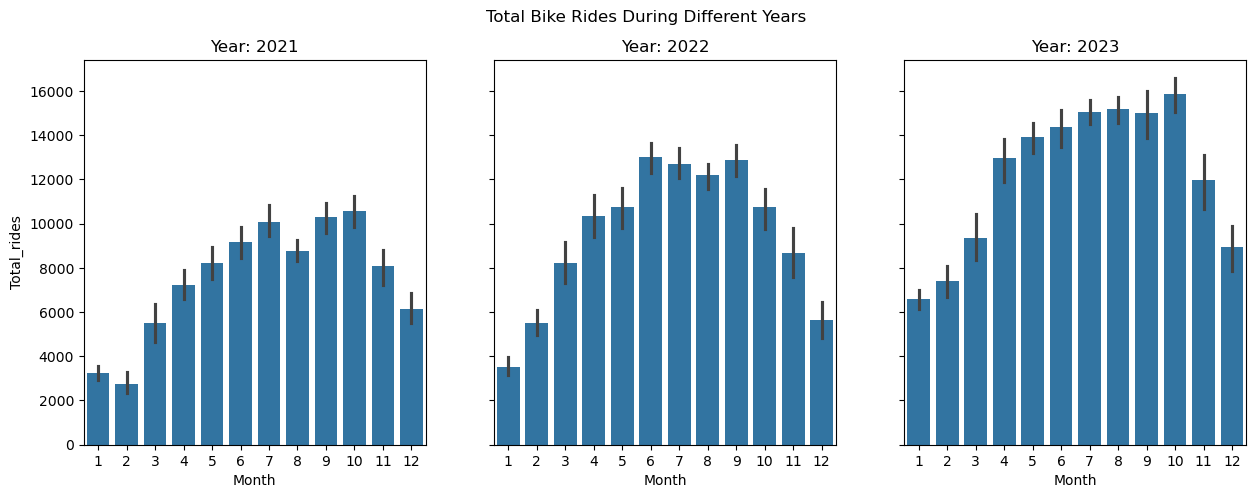

In [11]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5),  sharey=True)
fig.suptitle('Total Bike Rides During Different Years')

for i, year in enumerate(dfD['Year'].unique()):
    year_data = dfD[dfD['Year'] == year]
    sns.barplot(data=year_data, x='Month', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()


In [12]:
dfD.apply(lambda x: len(x.unique()))

Casual         1010
Date           1095
Member         1034
Total_rides    1042
Atemp           398
Temp            350
weather          13
Windspeed       239
Month            12
Year              3
Count          1095
dtype: int64

In [13]:
# Extract Day of Week
dfD['Weekdays'] = dfD['Date'].dt.dayofweek

In [14]:
dfD.head()

,Casual,Date,Member,Total_rides,Atemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,4
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,5
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,6
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,0
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4,1


In [15]:
# Convert 'Date' to datetime objects if it's not already.  This is VERY important!
# dfD['Date'] = pd.to_datetime(dfD['Date'])

# Define Holidays (Replace with your actual holiday dates as datetime objects)
holidays = ['2023-12-25', '2024-01-01']
holidays = pd.to_datetime(holidays)

# Create is_weekend and is_holiday columns
dfD['weekend'] = dfD['Weekdays'].isin([5, 6])  # More efficient way to check for weekends
dfD['holiday'] = dfD['Date'].isin(holidays)

# Calculate is_working_day
dfD['working_day'] = ~dfD['weekend'] & ~dfD['holiday']  # More concise



In [16]:
# Analyze Weekend Data
weekend_data = dfD[dfD['weekend']]
weekend_rides = weekend_data['Total_rides'].sum()
weekend_casual = weekend_data['Casual'].sum()
weekend_member = weekend_data['Member'].sum()
print("Weekend Data:")
print(weekend_data)
print(f"Total Weekend Rides: {weekend_rides}")
print(f"Total Weekend Casual Riders: {weekend_casual}")
print(f"Total Weekend Member Riders: {weekend_member}")


Weekend Data:
      Casual       Date  Member  Total_rides  Atemp  Temp  weather  Windspeed  \
1       2874 2021-01-02    2844         5718    4.8   7.6       61       19.1   
2        495 2021-01-03    1133         1628    0.9   3.9       63       13.0   
8       1490 2021-01-09    2582         4072   -3.8   1.7        2       19.4   
9       1479 2021-01-10    2522         4001   -1.8   2.6        1       18.7   
15      1850 2021-01-16    2841         4691    0.6   4.3       53       16.2   
...      ...        ...     ...          ...    ...   ...      ...        ...   
1080    2044 2023-12-17    3976         6020  -11.5  -7.4        0       10.9   
1086    2150 2023-12-23    4101         6251  -10.2  -6.1        1        9.8   
1087    1518 2023-12-24    2933         4451   -9.2  -5.2        1       10.1   
1093    3097 2023-12-30    4497         7594   -7.3  -2.9        1       13.8   
1094    2839 2023-12-31    4488         7327   -8.9  -4.6        0       10.2   

      Month  

In [17]:
# Analyze Working Day Data
working_day_data = dfD[dfD['working_day']]
working_day_rides = working_day_data['Total_rides'].sum()
working_day_casual = working_day_data['Casual'].sum()
working_day_member = working_day_data['Member'].sum()

print("\nWorking Day Data:")
print(working_day_data)
print(f"Total Working Day Rides: {working_day_rides}")
print(f"Total Working Day Casual Riders: {working_day_casual}")
print(f"Total Working Day Member Riders: {working_day_member}")


Working Day Data:
      Casual       Date  Member  Total_rides  Atemp  Temp  weather  Windspeed  \
0        371 2021-01-01     590          961   -0.9   2.3       63       10.6   
3        907 2021-01-04    2074         2981    1.0   4.1        3       13.3   
4       1057 2021-01-05    2004         3061    1.4   4.0       51        9.2   
5       1359 2021-01-06    1753         3112   -1.1   3.4        3       20.8   
6       1167 2021-01-07    2143         3310   -1.3   2.9        3       14.4   
...      ...        ...     ...          ...    ...   ...      ...        ...   
1085    2393 2023-12-22    5197         7590  -10.9  -6.8        1        8.3   
1089    1090 2023-12-26    2607         3697   -8.9  -4.8        1        9.4   
1090     646 2023-12-27    1934         2580   -8.6  -4.3       71       10.1   
1091    3099 2023-12-28    4819         7918   -7.0  -2.5        0       12.8   
1092    3491 2023-12-29    5168         8659   -7.8  -3.9        1        9.5   

      Mo

In [18]:
# Analyze Holiday Data (Added)
holiday_data = dfD[dfD['holiday']]
holiday_rides = holiday_data['Total_rides'].sum()
holiday_casual = holiday_data['Casual'].sum()
holiday_member = holiday_data['Member'].sum()

print("\nHoliday Data:")
print(holiday_data)
print(f"Total Holiday Rides: {holiday_rides}")
print(f"Total Holiday Casual Riders: {holiday_casual}")
print(f"Total Holiday Member Riders: {holiday_member}")                                


Holiday Data:
      Casual       Date  Member  Total_rides  Atemp  Temp  weather  Windspeed  \
1088    2072 2023-12-25    2263         4335   -8.9  -4.7        1       12.7   

      Month  Year  Count  Weekdays  weekend  holiday  working_day  
1088     12  2023   1088         0    False     True        False  
Total Holiday Rides: 4335
Total Holiday Casual Riders: 2072
Total Holiday Member Riders: 2263


In [19]:
dfD.columns

Index(['Casual', 'Date', 'Member', 'Total_rides', 'Atemp', 'Temp', 'weather',
       'Windspeed', 'Month', 'Year', 'Count', 'Weekdays', 'weekend', 'holiday',
       'working_day'],
      dtype='object')

In [20]:
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

dfD['Weekdays'] = dfD['Weekdays'].map(days)

In [21]:
# Define a function to determine the season based on the month
def get_season(Month):
    if Month in [12, 1, 2]:
        return 'Winter'
    elif Month in [3, 4, 5]:
        return 'Spring'
    elif Month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the get_season function to the 'Month' column and create a new 'Season' column
dfD['Season'] = dfD['Month'].apply(get_season)
dfD.head()

,Casual,Date,Member,Total_rides,Atemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays,weekend,holiday,working_day,Season
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,Friday,False,False,True,Winter
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,Saturday,True,False,False,Winter
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,Sunday,True,False,False,Winter
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,Monday,False,False,True,Winter
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4,Tuesday,False,False,True,Winter


In [22]:
df= dfD.copy()
df= df.drop(['Season', 'Weekdays'], axis=1, inplace=True)

In [23]:
# # Create a correlation matrix for red wine features
# plt.figure(figsize=(10,8))
# corr_matrix_Daily = df.corr()

# # Create a mask for the upper triangle
# mask = np.triu(np.ones_like(corr_matrix_Daily, dtype=bool))
# sns.heatmap(corr_matrix_Daily, annot=True, cmap="YlGnBu",fmt= '.2f', square=True, mask=mask)
# plt.title('Correlation Matrix')
# plt.show()

In [24]:
# 1. Convert 'Date' column to datetime format (Important!)
dfD['Date'] = pd.to_datetime(dfD['Date'])

# 2. Define Holidays (Crucial: Provide actual date strings or datetime objects)
holidays = ['2023-12-25', '2024-01-01']  # Example holidays - Replace with your list
holidays = pd.to_datetime(holidays) # Convert the holiday strings to datetime

# 3. Extract Weekday
dfD['Weekdays'] = dfD['Date'].dt.dayofweek

# 4. Categorize Days (Functions remain the same)
def is_weekday(day):
    return day < 5

def is_weekend(day):
    return day >= 5

dfD['is_weekday'] = dfD['Weekdays'].apply(is_weekday)
dfD['is_weekend'] = dfD['Weekdays'].apply(is_weekend)

# 5. Create 'is_holiday' column (Correctly using .isin() with the holiday *dates*)
dfD['is_holiday'] = dfD['Date'].isin(holidays)

# 6. Calculate 'is_working_day'
dfD['is_working_day'] = dfD['is_weekday'] & ~dfD['is_holiday']

# Example usage:
weekend_data = dfD[dfD['is_weekend']]
working_day_data = dfD[dfD['is_working_day']]
holiday_data = dfD[dfD['is_holiday']]  # Added holiday_data

print("Weekend Data:\n", weekend_data)
print("\nWorking Day Data:\n", working_day_data)
print("\nHoliday Data:\n", holiday_data) # Print holiday data
print("\nDataFrame Head:\n", dfD.head())

Weekend Data:
       Casual       Date  Member  Total_rides  Atemp  Temp  weather  Windspeed  \
1       2874 2021-01-02    2844         5718    4.8   7.6       61       19.1   
2        495 2021-01-03    1133         1628    0.9   3.9       63       13.0   
8       1490 2021-01-09    2582         4072   -3.8   1.7        2       19.4   
9       1479 2021-01-10    2522         4001   -1.8   2.6        1       18.7   
15      1850 2021-01-16    2841         4691    0.6   4.3       53       16.2   
...      ...        ...     ...          ...    ...   ...      ...        ...   
1080    2044 2023-12-17    3976         6020  -11.5  -7.4        0       10.9   
1086    2150 2023-12-23    4101         6251  -10.2  -6.1        1        9.8   
1087    1518 2023-12-24    2933         4451   -9.2  -5.2        1       10.1   
1093    3097 2023-12-30    4497         7594   -7.3  -2.9        1       13.8   
1094    2839 2023-12-31    4488         7327   -8.9  -4.6        0       10.2   

      Month 

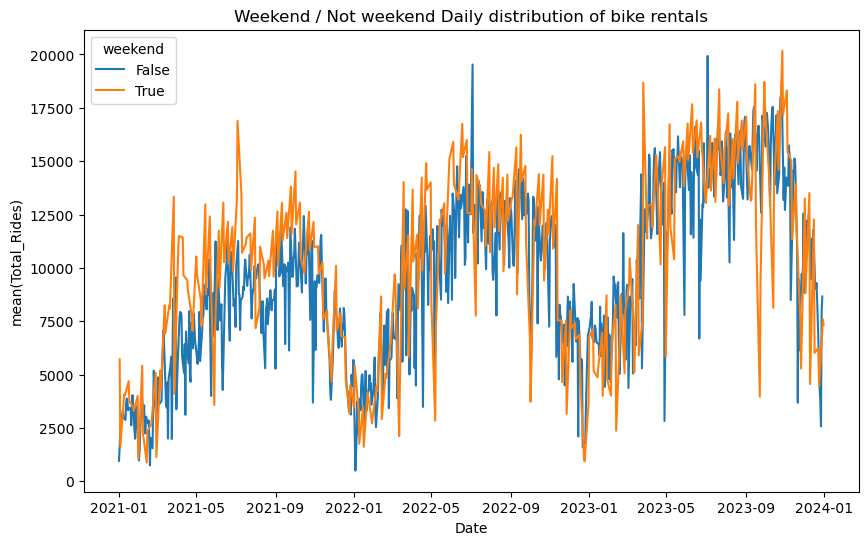

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and weekend/not weekend
sns.lineplot(x='Date', y='Total_rides', hue='weekend', data=dfD, estimator='mean')

# Add title and labels
plt.title('Weekend / Not weekend Daily distribution of bike rentals')
plt.xlabel('Date')
plt.ylabel('mean(Total_Rides)')

# Show the plot
plt.show()

In [26]:
dfD.head()

,Casual,Date,Member,Total_rides,Atemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays,weekend,holiday,working_day,Season,is_weekday,is_weekend,is_holiday,is_working_day
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,4,False,False,True,Winter,True,False,False,True
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,5,True,False,False,Winter,False,True,False,False
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,6,True,False,False,Winter,False,True,False,False
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,0,False,False,True,Winter,True,False,False,True
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4,1,False,False,True,Winter,True,False,False,True


In [27]:
days

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [28]:
dfD.isnull().sum()

Casual            0
Date              0
Member            0
Total_rides       0
Atemp             0
Temp              0
weather           0
Windspeed         0
Month             0
Year              0
Count             0
Weekdays          0
weekend           0
holiday           0
working_day       0
Season            0
is_weekday        0
is_weekend        0
is_holiday        0
is_working_day    0
dtype: int64

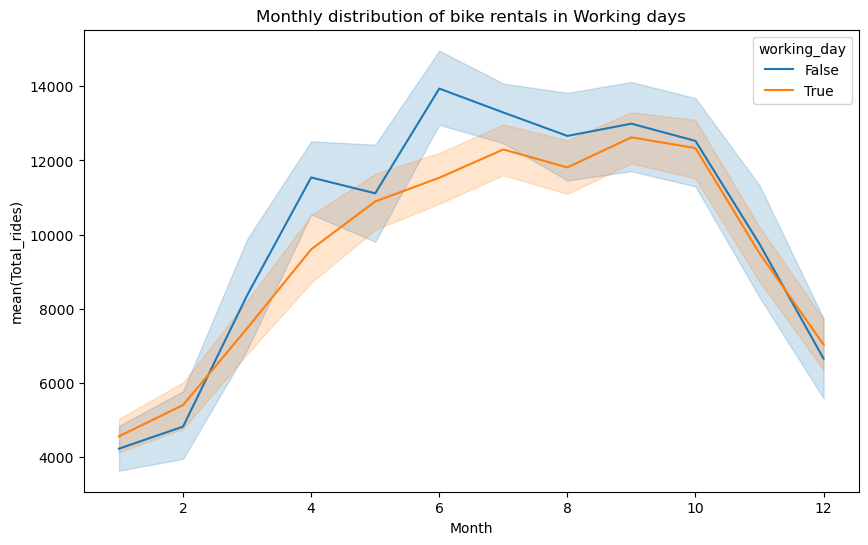

In [29]:
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and weekend/not weekend
sns.lineplot(x='Month', y='Total_rides', hue='working_day', data=dfD, estimator='mean')

# Add title and labels
plt.title('Monthly distribution of bike rentals in Working days')
plt.xlabel('Month')
plt.ylabel('mean(Total_rides)')

# Show the plot
plt.show()

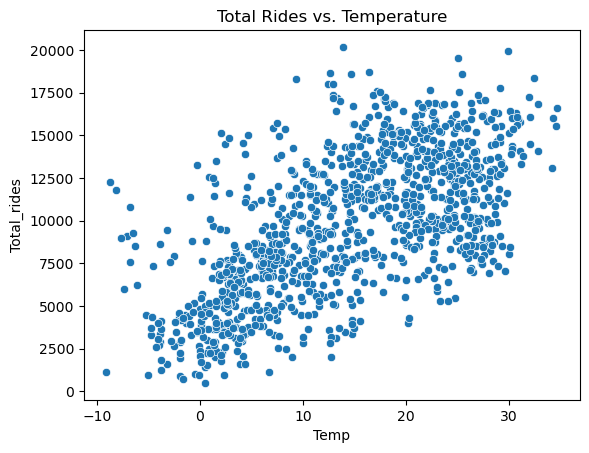

In [30]:

# Scatter plot: Total_rides vs. temperature_2m_mean
sns.scatterplot(x='Temp', y='Total_rides', data=dfD)
plt.title('Total Rides vs. Temperature')
plt.show()

<Figure size 640x480 with 0 Axes>

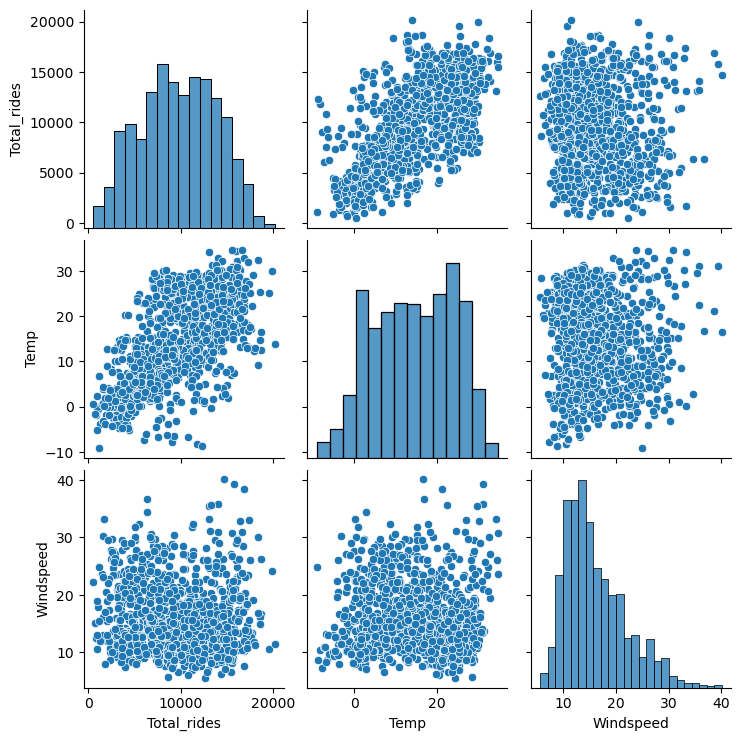

In [31]:
# Pair plot: Visualize relationships between multiple features
plot = plt.figure(figure = (8,6))
sns.pairplot(dfD[['Total_rides', 'Temp', 'Windspeed']])
plt.show()

In [32]:
dfD.columns

Index(['Casual', 'Date', 'Member', 'Total_rides', 'Atemp', 'Temp', 'weather',
       'Windspeed', 'Month', 'Year', 'Count', 'Weekdays', 'weekend', 'holiday',
       'working_day', 'Season', 'is_weekday', 'is_weekend', 'is_holiday',
       'is_working_day'],
      dtype='object')

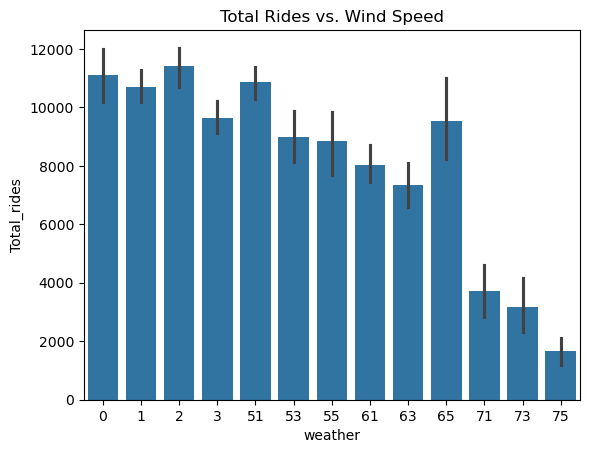

In [54]:
# Scatter plot: Total_rides vs. windspeed_10m_max
sns.barplot(x='weather', y='Total_rides',data=dfD)
plt.title('Total Rides vs. Wind Speed')
plt.show()

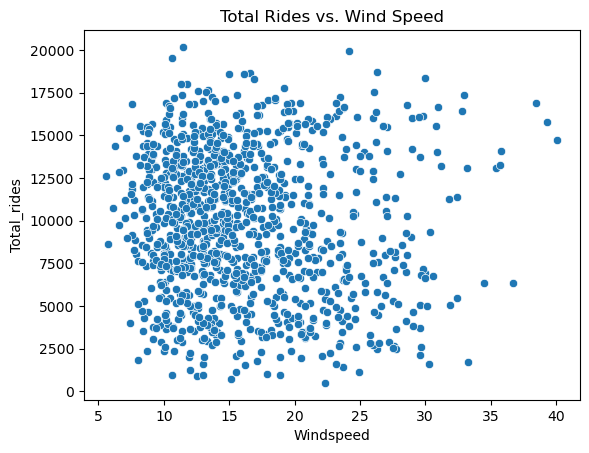

In [33]:
# Scatter plot: Total_rides vs. windspeed_10m_max
sns.scatterplot(x='Windspeed', y='Total_rides', data=dfD)
plt.title('Total Rides vs. Wind Speed')
plt.show()

[Text(0.5, 1.0, 'Count of bikes during different years')]

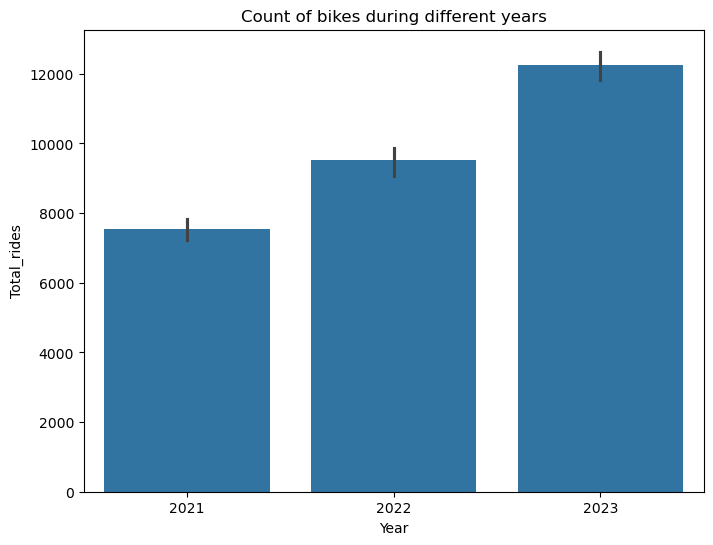

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=dfD, x='Year', y='Total_rides', ax=ax)
ax.set(title='Count of bikes during different years')

[Text(0.5, 1.0, 'Total bike Rides during Weekdays')]

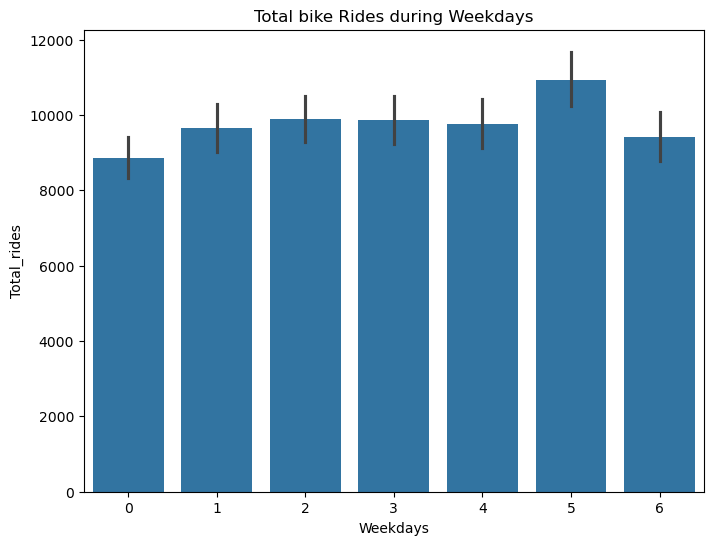

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=dfD, x='Weekdays', y='Total_rides', ax=ax)
ax.set(title='Total bike Rides during Weekdays')

In [36]:
dfD.head()

,Casual,Date,Member,Total_rides,Atemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays,weekend,holiday,working_day,Season,is_weekday,is_weekend,is_holiday,is_working_day
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,4,False,False,True,Winter,True,False,False,True
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,5,True,False,False,Winter,False,True,False,False
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,6,True,False,False,Winter,False,True,False,False
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,0,False,False,True,Winter,True,False,False,True
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4,1,False,False,True,Winter,True,False,False,True


[Text(0.5, 1.0, 'Total bike Rides in Season')]

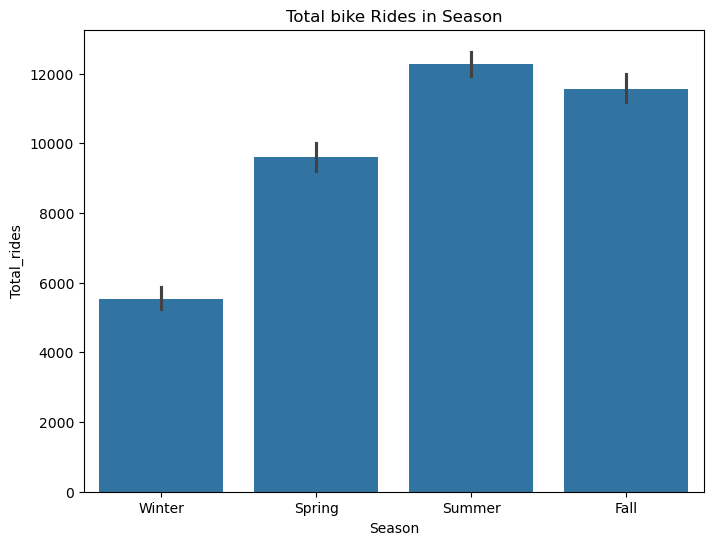

In [37]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=dfD, x='Season', y='Total_rides', ax=ax)
ax.set(title='Total bike Rides in Season')

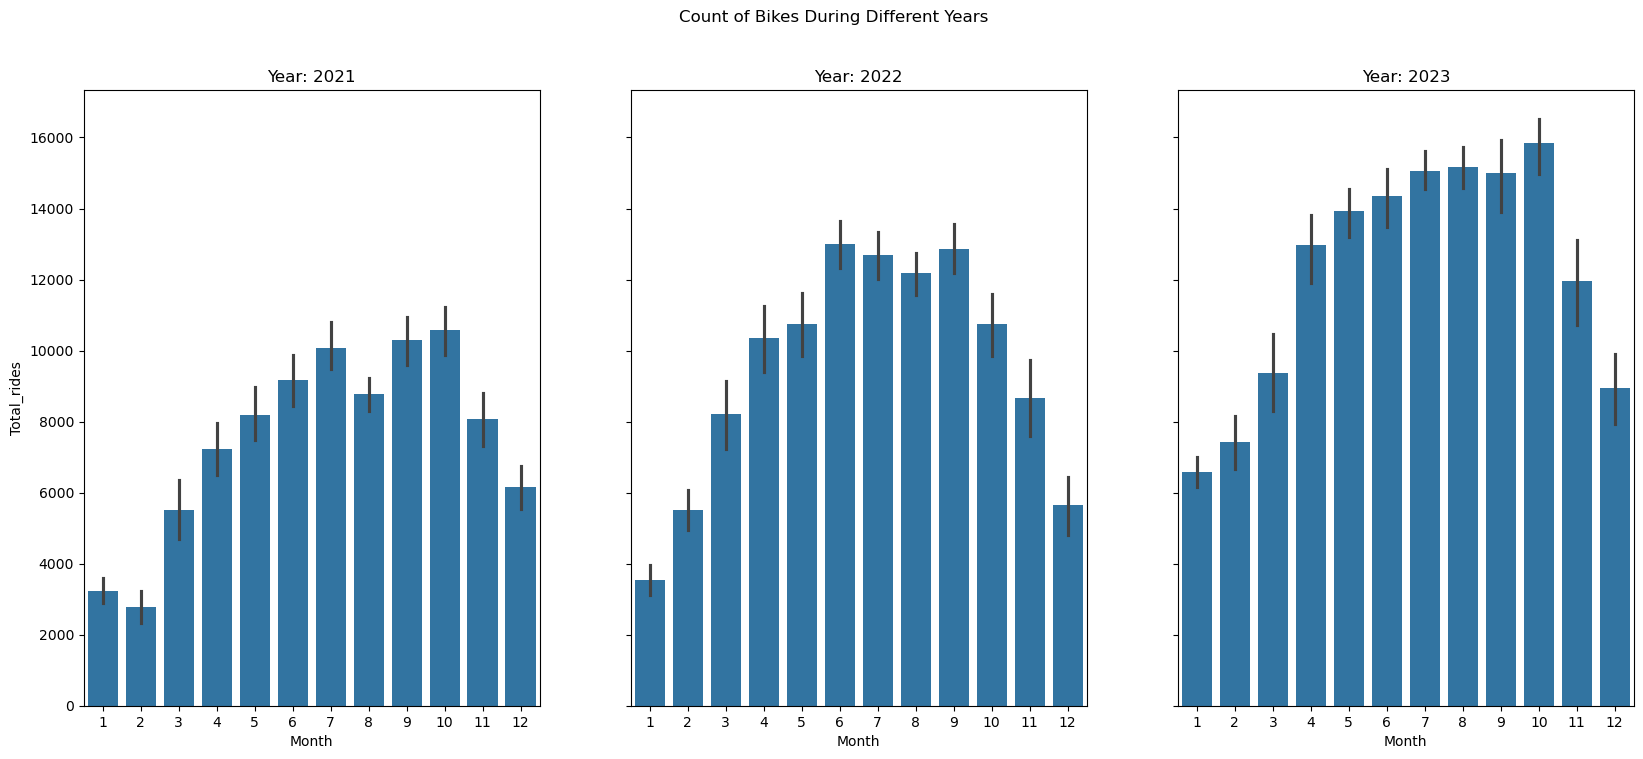

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8),  sharey=True)
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfD['Year'].unique()):
    year_data = dfD[dfD['Year'] == year]
    sns.barplot(data=year_data, x='Month', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()

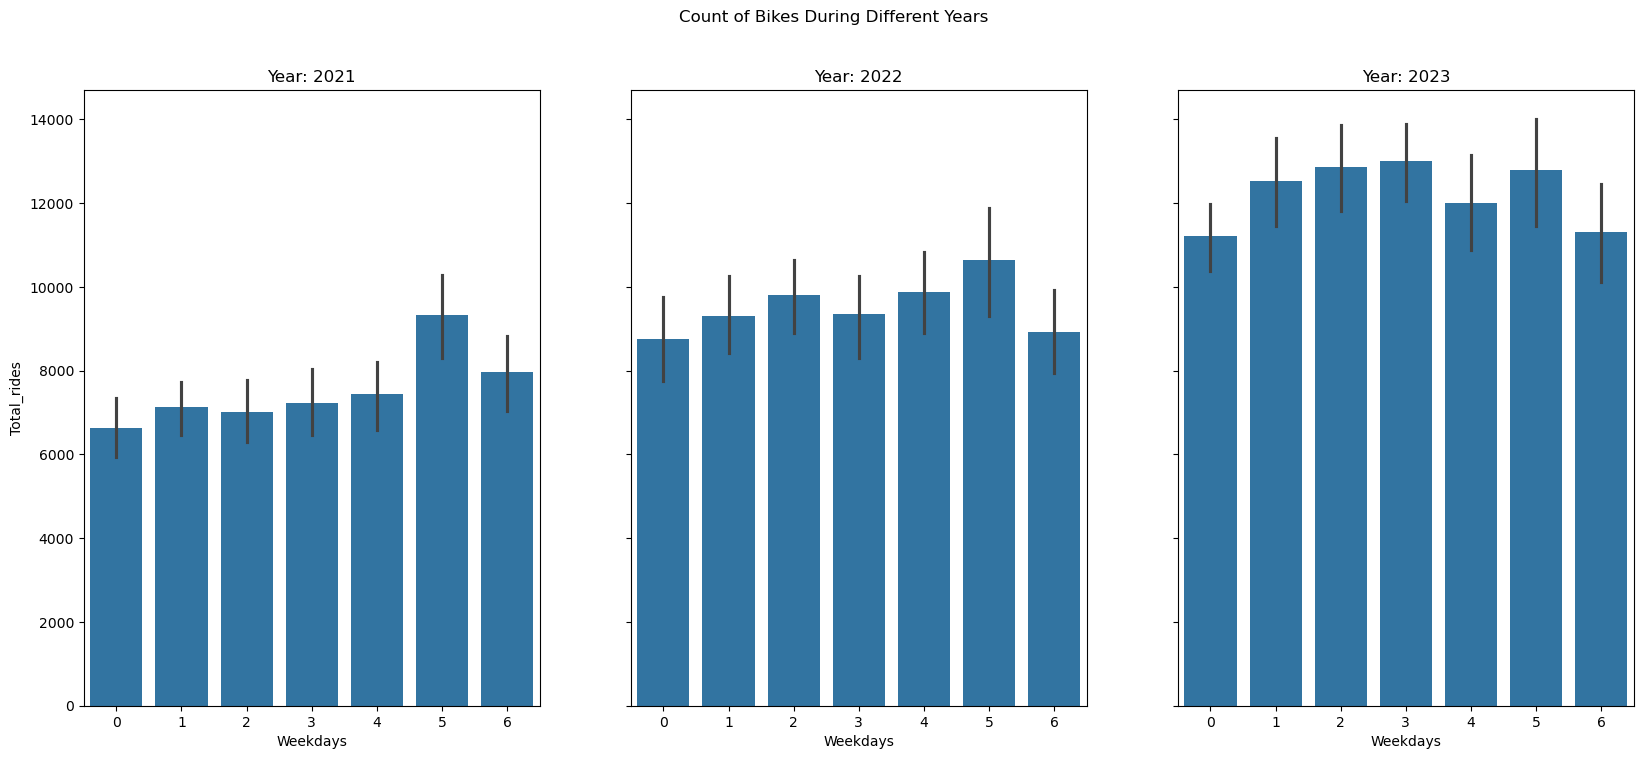

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8),  sharey=True)
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfD['Year'].unique()):
    year_data = dfD[dfD['Year'] == year]
    sns.barplot(data=year_data, x='Weekdays', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()

In [40]:
dfD.head(3)

,Casual,Date,Member,Total_rides,Atemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays,weekend,holiday,working_day,Season,is_weekday,is_weekend,is_holiday,is_working_day
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,4,False,False,True,Winter,True,False,False,True
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,5,True,False,False,Winter,False,True,False,False
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,6,True,False,False,Winter,False,True,False,False


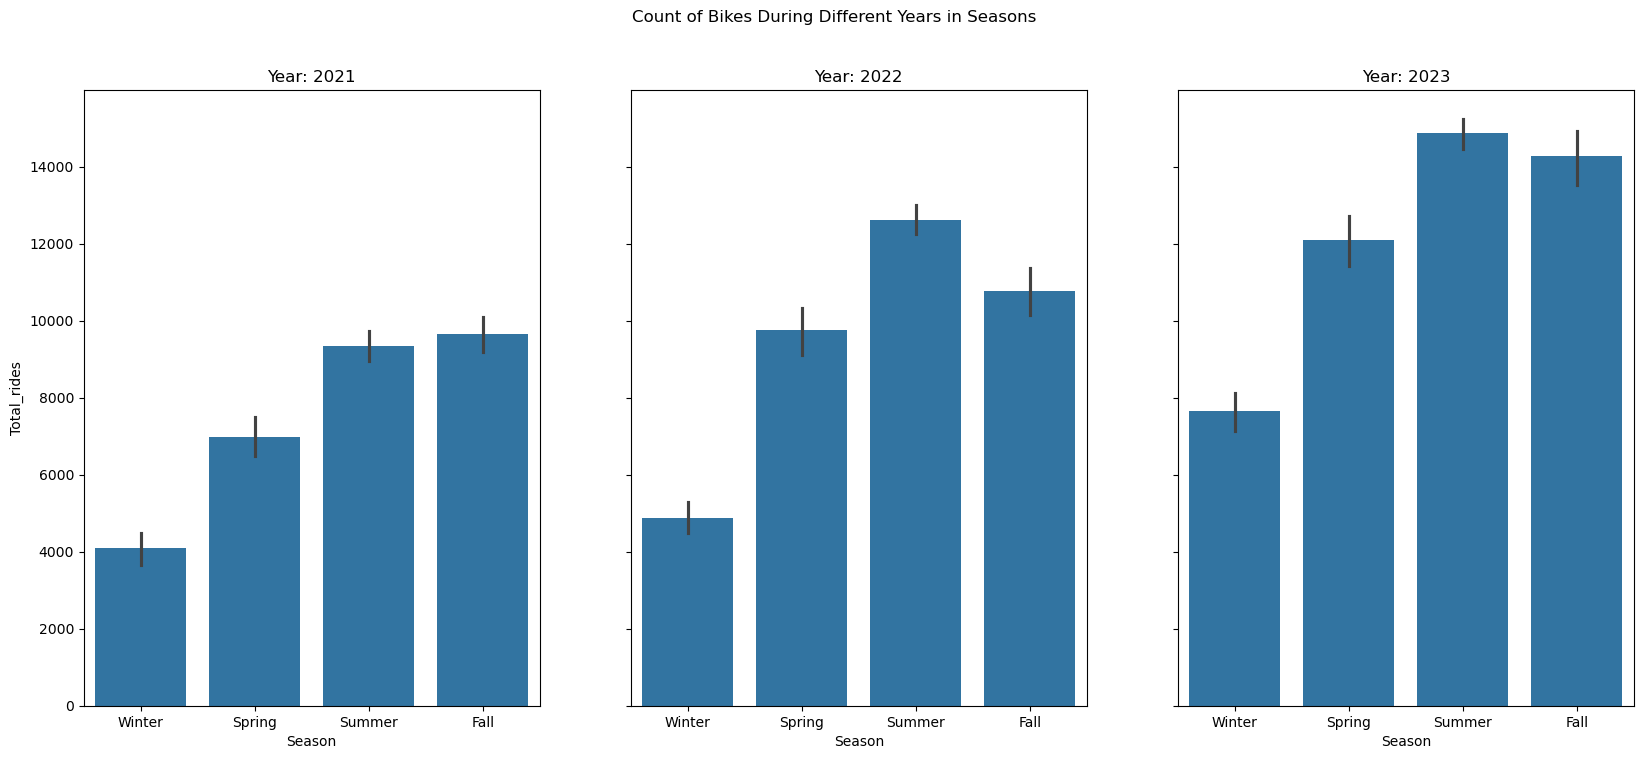

In [41]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8),  sharey=True)
fig.suptitle('Count of Bikes During Different Years in Seasons')

for i, year in enumerate(dfD['Year'].unique()):
    year_data = dfD[dfD['Year'] == year]
    sns.barplot(data=year_data, x='Season', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()


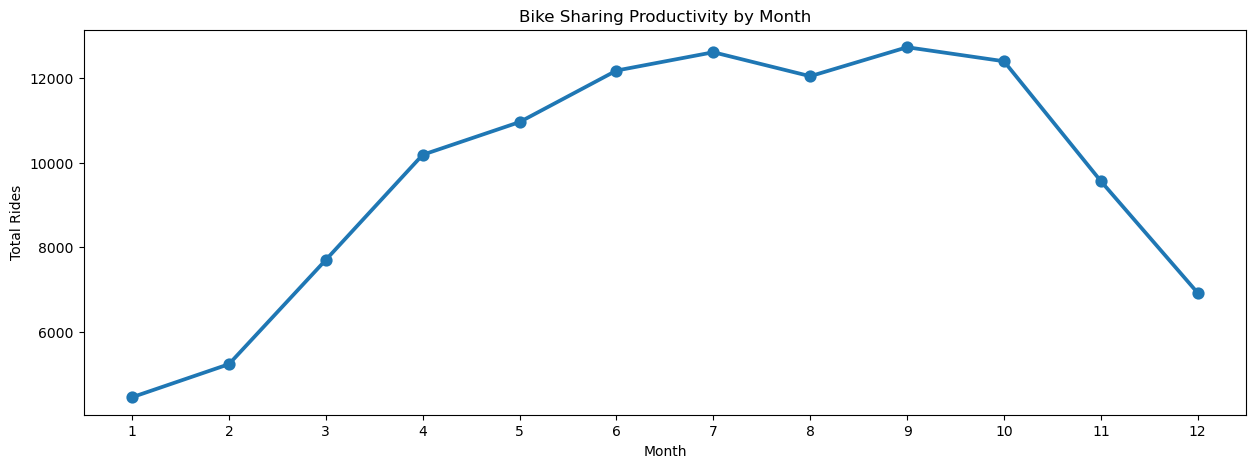

In [42]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(data=dfD, x='Month', y='Total_rides',errorbar=None, ax=ax)
ax.set(title='Bike Sharing Productivity by Month')
ax.set_ylabel('Total Rides')
ax.set_xlabel('Month')
plt.show()

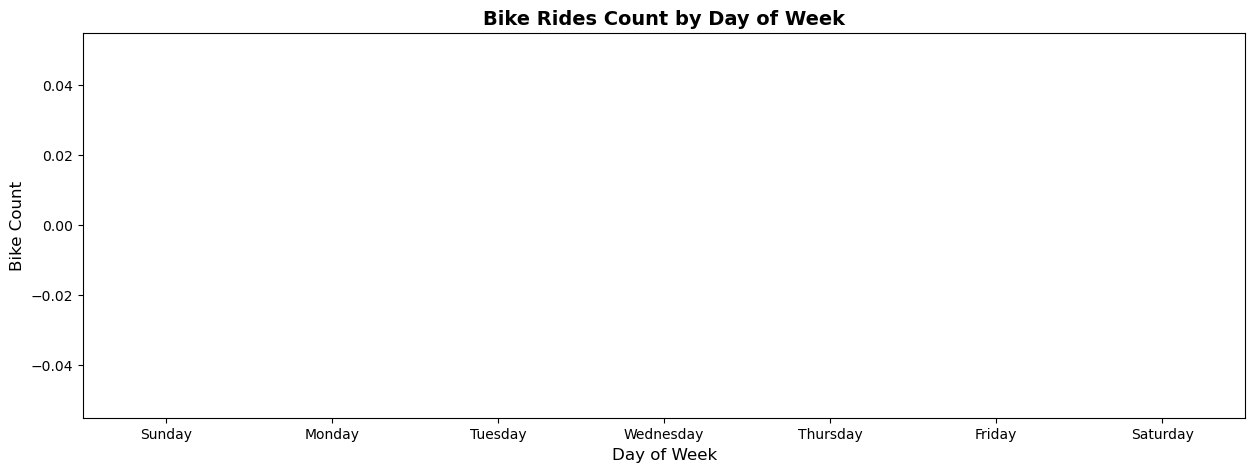

Count of Bike Count by Day of Week:
Weekdays
4    157
5    157
6    157
0    156
1    156
2    156
3    156
Name: count, dtype: int64


In [43]:
# Displaying the most common bike rides count by day of week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(15,5))
sns.barplot(x="Weekdays", y="Count", hue="Weekdays", legend=False, data=dfD, palette="twilight", order=day_order)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Day of Week", fontsize=14, fontweight='bold')
plt.show()

print('Count of Bike Count by Day of Week:')
print(dfD['Weekdays'].value_counts())

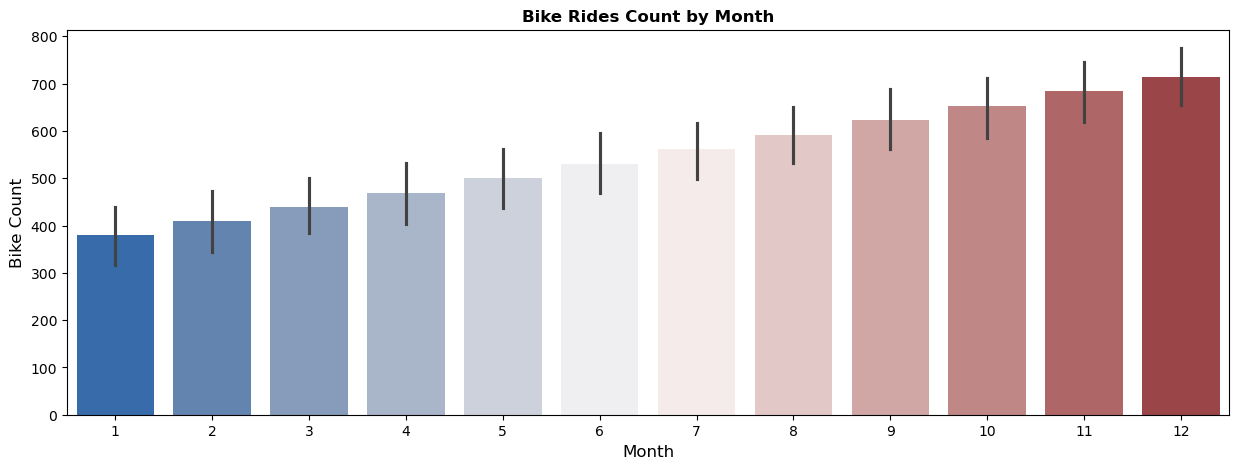

In [44]:
# Displaying the most common bike rides count by month
plt.figure(figsize=(15,5))
sns.barplot(x="Month", y="Count", hue="Month", legend=False, data=dfD, palette="vlag")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Month", fontsize=12, fontweight='bold')
plt.show()

In [45]:
dfD.head(4)

,Casual,Date,Member,Total_rides,Atemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays,weekend,holiday,working_day,Season,is_weekday,is_weekend,is_holiday,is_working_day
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,4,False,False,True,Winter,True,False,False,True
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,5,True,False,False,Winter,False,True,False,False
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,6,True,False,False,Winter,False,True,False,False
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,0,False,False,True,Winter,True,False,False,True


ValueError: cannot convert float NaN to integer

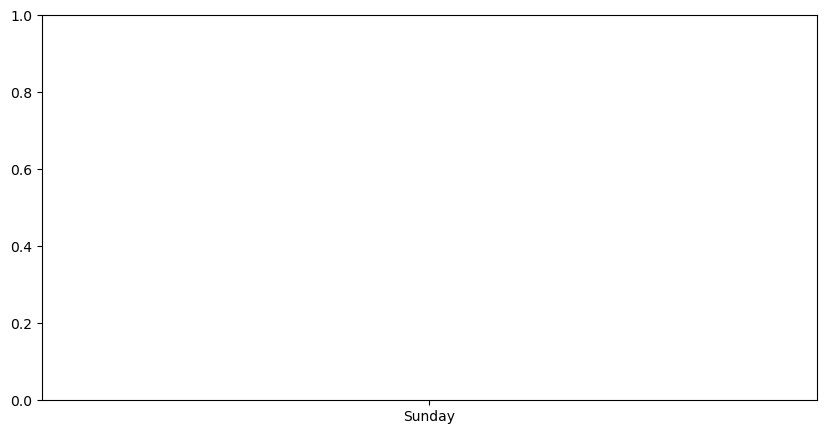

In [46]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=dfD, x='Weekdays', y='Total_rides', ax=ax, order=day_order)
ax.set(title='Bike Sharing Productivity Based on Weekdays')
ax.set_ylabel('Total Rides')
ax.set_xlabel('Weekdays')
plt.show()

In [ ]:
dfD.head()

,Casual,Date,Member,Total_rides,Atemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays,weekend,holiday,working_day,Season
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,Friday,False,False,True,Winter
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,Saturday,True,False,False,Winter
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,Sunday,True,False,False,Winter
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,Monday,False,False,True,Winter
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4,Tuesday,False,False,True,Winter


<Axes: xlabel='Windspeed', ylabel='Total_rides'>

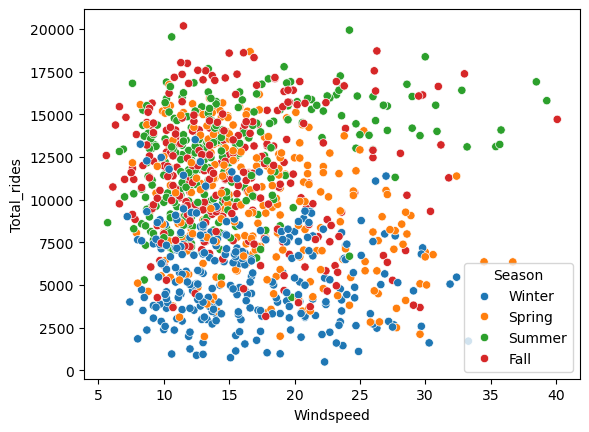

In [ ]:
sns.scatterplot(data=dfD, x= "Windspeed", y="Total_rides", hue= "Season")

<Axes: xlabel='Temp', ylabel='Total_rides'>

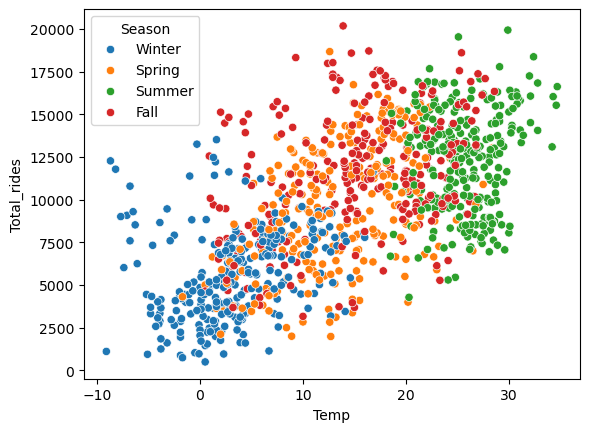

In [ ]:
sns.scatterplot(data=dfD, x= "Temp", y="Total_rides", hue= "Season")

<Axes: xlabel='Atemp', ylabel='Total_rides'>

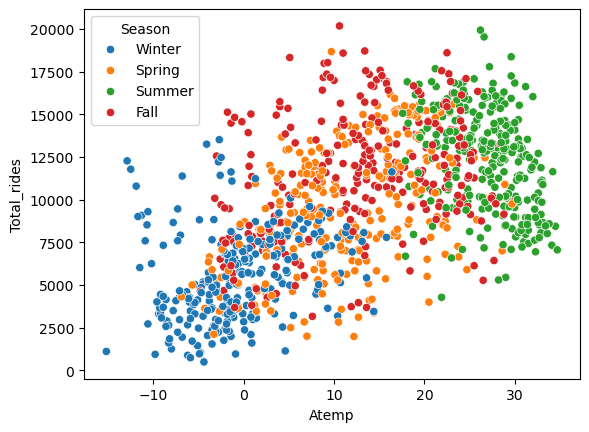

In [ ]:
sns.scatterplot(data=dfD, x= "Atemp", y="Total_rides", hue= "Season")

In [ ]:
sum_casual_user = dfD.groupby("Weekdays").Casual.sum().sort_values(ascending=False).reset_index()
sum_casual_user

,Weekdays,Casual
0,Saturday,840122
1,Sunday,705820
2,Friday,599988
3,Thursday,536729
4,Wednesday,515054
5,Tuesday,503873
6,Monday,499617


In [ ]:
sum_registered_user = dfD.groupby("Weekdays").Member.sum().sort_values(ascending=False).reset_index()
sum_registered_user

,Weekdays,Member
0,Wednesday,1028673
1,Tuesday,1002029
2,Thursday,1001762
3,Friday,931709
4,Monday,883785
5,Saturday,874508
6,Sunday,770328


In [ ]:
daily_user = pd.merge(
    left=sum_casual_user,
    right=sum_registered_user,
    how="left",
    left_on="Weekdays",
    right_on="Weekdays"
)
daily_user

,Weekdays,Casual,Member
0,Saturday,840122,874508
1,Sunday,705820,770328
2,Friday,599988,931709
3,Thursday,536729,1001762
4,Wednesday,515054,1028673
5,Tuesday,503873,1002029
6,Monday,499617,883785


In [ ]:
daily_user_type = daily_user.melt(id_vars='Weekdays', var_name='User_type', value_name='user_count')
daily_user_type

,Weekdays,User_type,user_count
0,Saturday,Casual,840122
1,Sunday,Casual,705820
2,Friday,Casual,599988
3,Thursday,Casual,536729
4,Wednesday,Casual,515054
5,Tuesday,Casual,503873
6,Monday,Casual,499617
7,Saturday,Member,874508
8,Sunday,Member,770328
9,Friday,Member,931709


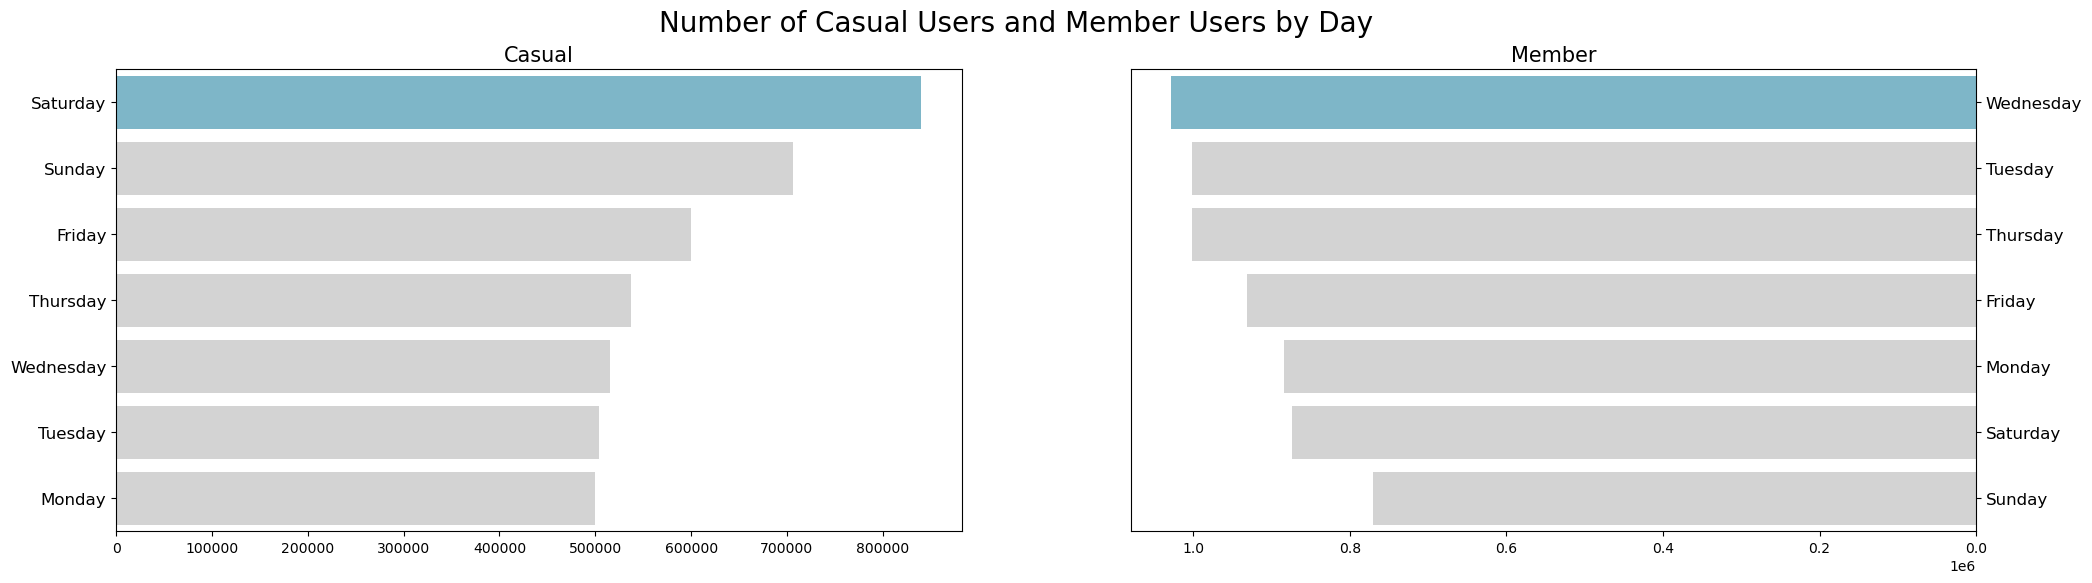

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="Casual", y="Weekdays", data=sum_casual_user, palette=colors, hue="Weekdays", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="Member", y="Weekdays", data=sum_registered_user, hue="Weekdays", legend=False, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Member", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Number of Casual Users and Member Users by Day", fontsize=20)
plt.show()

In [ ]:
dfD.head(2)

,Casual,Date,Member,Total_rides,Atemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays,weekend,holiday,working_day,Season
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,Friday,False,False,True,Winter
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,Saturday,True,False,False,Winter


Weather and Season Impact on Bike Sharing Productivity

In [ ]:
Weatherby = dfD.groupby("weather").total_user.sum().sort_values(ascending=False).reset_index()
Weatherby

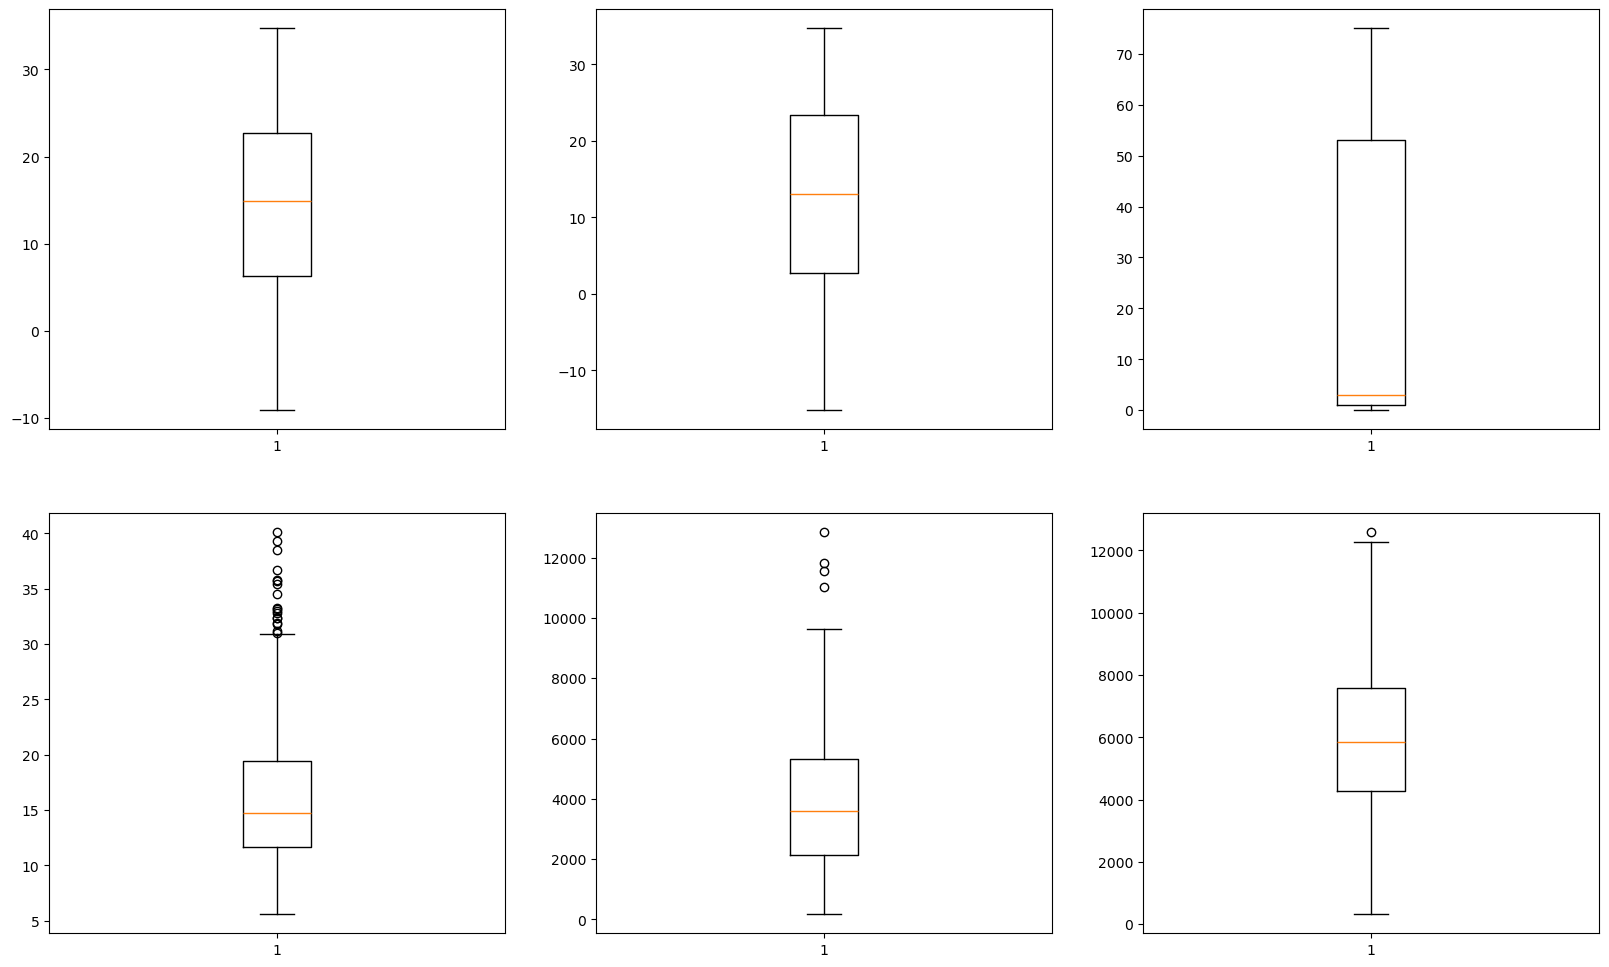

In [ ]:
#Plotting box plot of continuous variables

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.boxplot(dfD["Temp"])
plt.subplot(2,3,2)
plt.boxplot(dfD["Atemp"])
plt.subplot(2,3,3)
plt.boxplot(dfD["weather"])
plt.subplot(2,3,4)
plt.boxplot(dfD["Windspeed"])
plt.subplot(2,3,5)
plt.boxplot(dfD["Casual"])
plt.subplot(2,3,6)
plt.boxplot(dfD["Member"])
plt.show()

In [ ]:
dfD.head()

,Casual,Date,Member,Total_rides,Atemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays,weekend,holiday,working_day,Season
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,Friday,False,False,True,Winter
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,Saturday,True,False,False,Winter
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,Sunday,True,False,False,Winter
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,Monday,False,False,True,Winter
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4,Tuesday,False,False,True,Winter


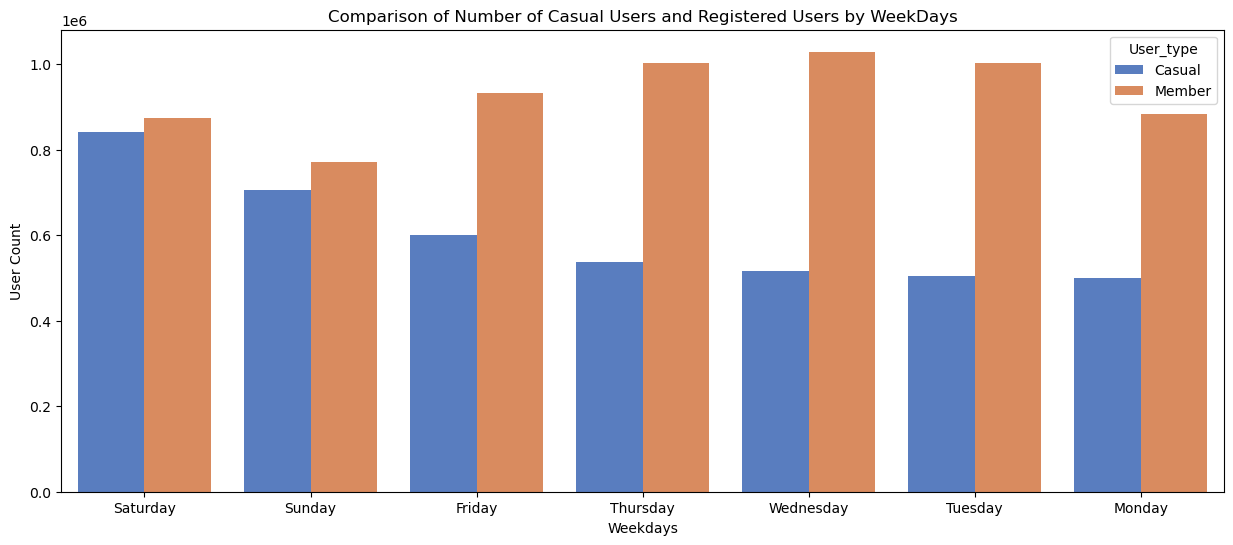

In [ ]:
plt.figure(figsize=(15, 6))


sns.barplot(x="Weekdays", y="user_count", hue="User_type", data=daily_user_type, palette="muted")
plt.ylabel('User Count')
plt.xlabel('Weekdays' )
plt.title("Comparison of Number of Casual Users and Registered Users by WeekDays")
plt.show()

In [ ]:
dfD.head()

,Casual,Date,Member,Total_rides,Atemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays,weekend,holiday,working_day,Season
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,Friday,False,False,True,Winter
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,Saturday,True,False,False,Winter
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,Sunday,True,False,False,Winter
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,Monday,False,False,True,Winter
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4,Tuesday,False,False,True,Winter


Text(0.5, 1.0, 'Daily Distribution of Bike Rentals')

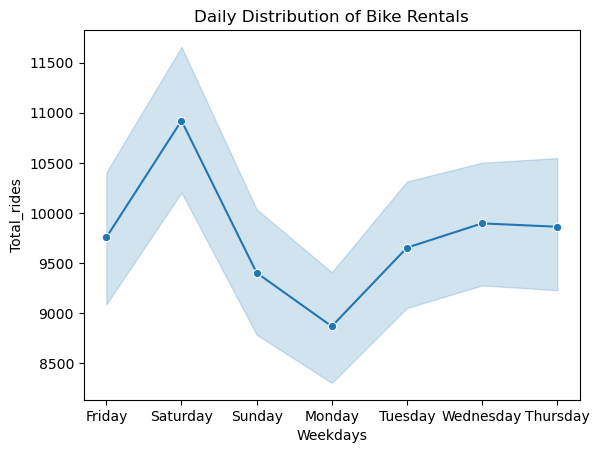

In [ ]:
# Daily distribution
sns.lineplot(x='Weekdays', y='Total_rides', data=dfD, marker ='o')
plt.title('Daily Distribution of Bike Rentals')
